### Завдання 1
Проведіть крос-валідацію для моделі, побудованої на основі датафрейму  student_scores. Обґрунтуйте обраний метод крос-валідації.


In [1]:
import pandas as pd
import numpy as np
import sklearn
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
X=np.array(df[['Hours']])
y=np.array(df[['Scores']])


#### Використаємо k-Fold кросс-валідацію та розіб'ємо виборку на 5 частин

In [4]:
model = LinearRegression()
kfold = KFold(n_splits=5)

#### Відоразимо виборку на графіку

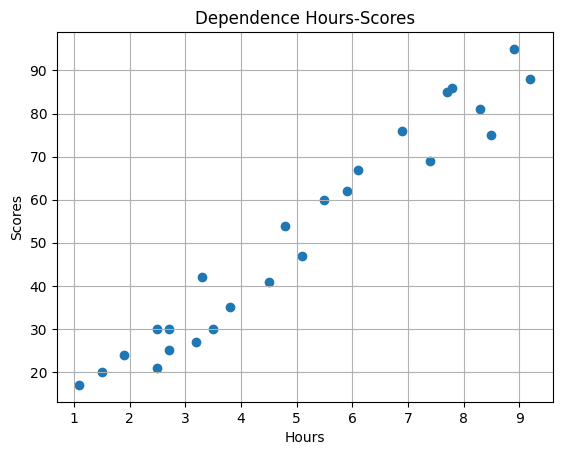

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Dependence Hours-Scores',
       xlabel = 'Hours',
       ylabel = 'Scores')
ax.scatter(df['Hours'],df['Scores'])
ax.grid()

#### Побудуємо 5 моделей регресій, в залежності від виборки та відобразимо їх на графіку.

Функція лінійної регресії має вигляд - Y=9.7456*X+4.4040 
Достовірність моделі на тренувальних даних: Score= 0.9688
Достовірність моделі на тестових даних: Score= 0.7863
Достовірність моделі на повній виборці: Score= 0.9478
mae = 8.843755
mse_test = 81.390570, mse_all = 32.016807
mrse= 9.021672

Функція лінійної регресії має вигляд - Y=10.0276*X+1.4646 
Достовірність моделі на тренувальних даних: Score= 0.9427
Достовірність моделі на тестових даних: Score= 0.9789
Достовірність моделі на повній виборці: Score= 0.9522
mae = 3.965785
mse_test = 16.505402, mse_all = 29.329835
mrse= 4.062684

Функція лінійної регресії має вигляд - Y=9.8163*X+1.5442 
Достовірність моделі на тренувальних даних: Score= 0.9561
Достовірність моделі на тестових даних: Score= 0.9318
Достовірність моделі на повній виборці: Score= 0.9520
mae = 5.569461
mse_test = 35.467532, mse_all = 29.435185
mrse= 5.955462

Функція лінійної регресії має вигляд - Y=9.8031*X+1.8200 
Достовірність моделі на тренувальних даних: Score=

C:\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Python\Python310\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spe

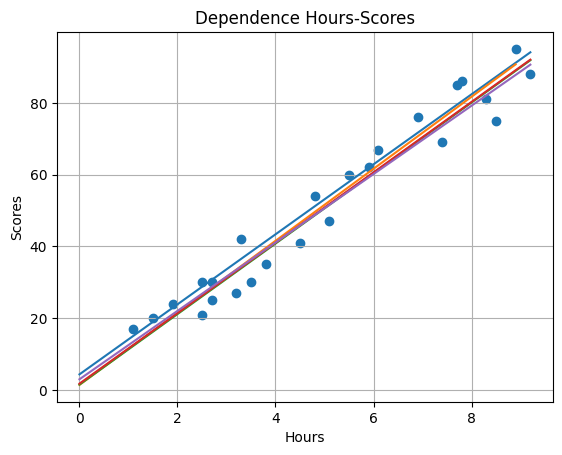

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Dependence Hours-Scores',
       xlabel = 'Hours',
       ylabel = 'Scores')
ax.scatter(df['Hours'],df['Scores'])
ax.grid()

for (train_index, test_index) in kfold.split(X):
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
   
    model.fit(X_train,y_train) 
    a=model.intercept_[0]
    b=model.coef_[0][0]
    print('Функція лінійної регресії має вигляд - Y={:.4f}*X+{:.4f} '.format(b,a))
    print('Достовірність моделі на тренувальних даних: Score= {:.4f}'.format(model.score(X_train, y_train)))
    print('Достовірність моделі на тестових даних: Score= {:.4f}'.format(model.score(X_test, y_test)))
    print('Достовірність моделі на повній виборці: Score= {:.4f}'.format(model.score(X, y)))
    y_pred=model.predict(X_test)
    y_pred_all=model.predict(X)
    print(f'mae = {mean_absolute_error(y_test,y_pred):4f}' )
    print(f'mse_test = {mean_squared_error(y_test,y_pred):4f}, mse_all = {mean_squared_error(y,y_pred_all):4f}')
    mrse=mean_squared_error(y_test,y_pred)**0.5
    print(f'mrse= {mrse:4f}\n')
    
    X_plt=[0,max(X_train)]
    y_plt=[a,b*X_plt[1]+a]
    ax.plot(X_plt,y_plt)


#### З графіків видно що всі моделі мають гарну кореляцію.



#### Проведемо той самий розрахунок з використанням функції cross_val_score на повній виборці та вирахуємо середне значення Score  по п'яти моделям.

In [9]:
model.fit(X,y)
kfold = KFold(n_splits=5)
score = cross_val_score(model, X, y, cv=kfold)
print(f"Score for K-fold: {score}")
print(f"Mean Score for fold:{score.mean()}")
y_pred=model.predict(X_test)
y_pred_all=model.predict(X)
print(f'mae = {mean_absolute_error(y_test,y_pred):4f}' )
print(f'mse_test = {mean_squared_error(y_test,y_pred):4f}, mse_all = {mean_squared_error(y,y_pred_all):4f}')
mrse=mean_squared_error(y_test,y_pred)**0.5
print(f'mrse= {mrse:4f}')

Score for K-fold: [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]
Mean Score for fold:0.9180771341891051
mae = 4.734839
mse_test = 26.669258, mse_all = 28.882731
mrse= 5.164229


#### Проведемо аналогічні розрахунки для вибірки з використанням функції train_test_split та побудуємо різні моделі

#### Модель1 з параметрами 
test_size=0.2  
random_state=None  
shuffle=True  
 

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
a=model.intercept_[0]
b=model.coef_[0][0]
print('Функція лінійної регресії має вигляд - Y={:.4f}*X+{:.4f} '.format(b,a))
print('Достовірність моделі на тренувальних даних: Score= {:.4f}'.format(model.score(X_train, y_train)))
print('Достовірність моделі на тестових даних: Score= {:.4f}'.format(model.score(X_test, y_test)))
print('Достовірність моделі на повній виборці: Score= {:.4f}'.format(model.score(X, y)))
y_pred=model.predict(X_test)
y_pred_all=model.predict(X)
print(f'mae = {mean_absolute_error(y_test,y_pred):4f}' )
print(f'mse_test = {mean_squared_error(y_test,y_pred):4f}, mse_all = {mean_squared_error(y,y_pred_all):4f}')
mrse=mean_squared_error(y_test,y_pred)**0.5
print(f'mrse= {mrse:4f}\n')

Функція лінійної регресії має вигляд - Y=9.5850*X+2.6190 
Достовірність моделі на тренувальних даних: Score= 0.9449
Достовірність моделі на тестових даних: Score= 0.9622
Достовірність моделі на повній виборці: Score= 0.9515
mae = 4.574808
mse_test = 32.096597, mse_all = 29.779651
mrse= 5.665386



#### Модель 2 з параметрами
test_size=0.2  
random_state=25  
shuffle=True  


In [12]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=25)
model.fit(X_train, y_train)
a=model.intercept_[0]
b=model.coef_[0][0]
print('Функція лінійної регресії має вигляд - Y={:.4f}*X+{:.4f} '.format(b,a))

print('Достовірність моделі на тренувальних даних: Score= {:.4f}'.format(model.score(X_train, y_train)))
print('Достовірність моделі на тестових даних: Score= {:.4f}'.format(model.score(X_test, y_test)))
print('Достовірність моделі на повній виборці: Score= {:.4f}'.format(model.score(X, y)))
y_pred=model.predict(X_test)
y_pred_all=model.predict(X)
print(f'mae = {mean_absolute_error(y_test,y_pred):4f}' )
print(f'mse_test = {mean_squared_error(y_test,y_pred):4f}, mse_all = {mean_squared_error(y,y_pred_all):4f}')
mrse=mean_squared_error(y_test,y_pred)**0.5
print(f'mrse= {mrse:4f}\n')


Функція лінійної регресії має вигляд - Y=9.5416*X+3.5066 
Достовірність моделі на тренувальних даних: Score= 0.9527
Достовірність моделі на тестових даних: Score= 0.9435
Достовірність моделі на повній виборці: Score= 0.9524
mae = 5.277957
mse_test = 31.954415, mse_all = 29.241238
mrse= 5.652824



#### Модель 3 з параметрами
test_size=0.2    
random_state=None    
shuffle=False   
   

In [13]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, shuffle=False)
model.fit(X_train, y_train)
a=model.intercept_[0]
b=model.coef_[0][0]
print('Функція лінійної регресії має вигляд - Y={:.4f}*X+{:.4f} '.format(b,a))

print('Достовірність моделі на тренувальних даних: Score= {:.4f}'.format(model.score(X_train, y_train)))
print('Достовірність моделі на тестових даних: Score= {:.4f}'.format(model.score(X_test, y_test)))
print('Достовірність моделі на повній виборці: Score= {:.4f}'.format(model.score(X, y)))
y_pred=model.predict(X_test)
y_pred_all=model.predict(X)
print(f'mae = {mean_absolute_error(y_test,y_pred):4f}' )
print(f'mse_test = {mean_squared_error(y_test,y_pred):4f}, mse_all = {mean_squared_error(y,y_pred_all):4f}')
mrse=mean_squared_error(y_test,y_pred)**0.5
print(f'mrse= {mrse:4f}\n')


Функція лінійної регресії має вигляд - Y=9.5204*X+3.0313 
Достовірність моделі на тренувальних даних: Score= 0.9555
Достовірність моделі на тестових даних: Score= 0.9273
Достовірність моделі на повній виборці: Score= 0.9514
mae = 5.346209
mse_test = 35.184296, mse_all = 29.818673
mrse= 5.931635



#### Побудуємо модель стратифікованої К-кратної крос-валідації із застосуванням классу  StratifiedKFold (n_splits=3)


In [28]:
model.fit(X,y)
skf = StratifiedKFold(n_splits=3)
for (train_index, test_index) in skf.split(X,y):
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
   
    model.fit(X_train,y_train) 
    a=model.intercept_[0]
    b=model.coef_[0][0]
    print('Функція лінійної регресії має вигляд - Y={:.4f}*X+{:.4f} '.format(b,a))
    print('Достовірність моделі на тренувальних даних: Score= {:.4f}'.format(model.score(X_train, y_train)))
    print('Достовірність моделі на тестових даних: Score= {:.4f}'.format(model.score(X_test, y_test)))
    print('Достовірність моделі на повній виборці: Score= {:.4f}'.format(model.score(X, y)))
    y_pred=model.predict(X_test)
    y_pred_all=model.predict(X)
    print(f'mae = {mean_absolute_error(y_test,y_pred):4f}' )
    print(f'mse_test = {mean_squared_error(y_test,y_pred):4f}, mse_all = {mean_squared_error(y,y_pred_all):4f}')
    mrse=mean_squared_error(y_test,y_pred)**0.5
    print(f'mrse= {mrse:4f}\n')

Функція лінійної регресії має вигляд - Y=9.7053*X+2.2196 
Достовірність моделі на тренувальних даних: Score= 0.9683
Достовірність моделі на тестових даних: Score= 0.9205
Достовірність моделі на повній виборці: Score= 0.9523
mae = 6.467004
mse_test = 45.601427, mse_all = 29.294082
mrse= 6.752883

Функція лінійної регресії має вигляд - Y=10.0705*X+0.6816 
Достовірність моделі на тренувальних даних: Score= 0.9459
Достовірність моделі на тестових даних: Score= 0.9628
Достовірність моделі на повній виборці: Score= 0.9519
mae = 4.080477
mse_test = 17.696063, mse_all = 29.519960
mrse= 4.206669

Функція лінійної регресії має вигляд - Y=9.5914*X+4.1532 
Достовірність моделі на тренувальних даних: Score= 0.9465
Достовірність моделі на тестових даних: Score= 0.9577
Достовірність моделі на повній виборці: Score= 0.9517
mae = 5.116703
mse_test = 30.748423, mse_all = 29.646477
mrse= 5.545126



C:\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


### Висновки

#### Всі застосовані моделі показують високі коефіцієнти достовірності, що свідчить про те, що побудована модель є надійною та може застосовуватися у подальших прогностичних розрахунках.
#### З отриманих розрахунків можна зробити висновок, що з усих застосованих методів найкращі показники ми отримали із використанням п'ятикратної крос-валідації. Найбільш вдалою є модель, отримана на другому етапі розбивки даних.

Оптимальна функція лінійної регресії має вигляд  $y=10.027x+1.4646$ 

Достовірність моделі на тренувальних даних: Score= 0.9427  
Достовірність моделі на тестових даних: Score= 0.9789  
Достовірність моделі на повній виборці: Score= 0.9522  
mae = 3.965785  
mse_test = 16.505402, mse_all = 29.329835  
mrse= 4.062684  